In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('task8.csv')
df

,id,X,Y,Class
0,1,96,11,1
1,2,76,24,1
2,3,98,11,0
3,4,89,71,0
4,5,87,99,0
5,6,31,40,0
6,7,73,35,1
7,8,33,30,0
8,9,87,88,1
9,10,81,30,1


In [6]:
pointX = 68
pointY = 46

In [8]:
# эвклидово расстояние
dE = np.sqrt((df['X'] - pointX)**2 + (df['Y'] - pointY)**2)
dE

0    44.821870
1    23.409400
2    46.097722
3    32.649655
4    56.302753
5    37.483330
6    12.083046
7    38.483763
8    46.097722
9    20.615528
dtype: float64

In [10]:
# класс точки при k = 3
df['dE'] = dE
df = df.sort_values(by='dE')
df

,id,X,Y,Class,dE
6,7,73,35,1,12.083046
9,10,81,30,1,20.615528
1,2,76,24,1,23.409400
3,4,89,71,0,32.649655
5,6,31,40,0,37.483330
7,8,33,30,0,38.483763
0,1,96,11,1,44.821870
2,3,98,11,0,46.097722
8,9,87,88,1,46.097722
4,5,87,99,0,56.302753


In [9]:
# манхэттенское расстояние
dM = np.abs(df['X'] - pointX) + np.abs(df['Y'] - pointY)
dM

0    63
1    30
2    65
3    46
4    72
5    43
6    16
7    51
8    61
9    29
dtype: int64

In [11]:
df['dM'] = dM
df = df.sort_values(by='dM')
df

,id,X,Y,Class,dE,dM
6,7,73,35,1,12.083046,16
9,10,81,30,1,20.615528,29
1,2,76,24,1,23.409400,30
5,6,31,40,0,37.483330,43
3,4,89,71,0,32.649655,46
7,8,33,30,0,38.483763,51
8,9,87,88,1,46.097722,61
0,1,96,11,1,44.821870,63
2,3,98,11,0,46.097722,65
4,5,87,99,0,56.302753,72


In [35]:
df = pd.read_csv('adult_data_train.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,HS-grad,9,Never-married,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,Some-college,10,Divorced,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,Self-emp-not-inc,179171,HS-grad,9,Never-married,Sales,Unmarried,Black,Female,0,0,38,Germany,0
26044,39,Private,421633,Some-college,10,Divorced,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,0
26045,55,Private,82098,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,0
26046,26,Private,50053,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,0


In [47]:
19775/26048

0.7591753685503686

In [36]:
# Избавьтесь от признаков education и marital-status
df = df.drop(['education', 'marital-status'], axis=1)
df

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,9,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,Self-emp-not-inc,179171,9,Sales,Unmarried,Black,Female,0,0,38,Germany,0
26044,39,Private,421633,10,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,0
26045,55,Private,82098,9,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,0
26046,26,Private,50053,13,Exec-managerial,Husband,White,Male,0,0,55,United-States,0


In [49]:
train = pd.read_csv('task8train.csv', sep=';')
train = train.drop(['education', 'marital-status'], axis=1)
train

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,9,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20833,40,Self-emp-inc,57233,9,Exec-managerial,Husband,White,Male,0,0,60,United-States,1
20834,35,Self-emp-not-inc,179171,9,Sales,Unmarried,Black,Female,0,0,38,Germany,0
20835,55,Private,82098,9,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,0
20836,26,Private,50053,13,Exec-managerial,Husband,White,Male,0,0,55,United-States,0


In [50]:
test = pd.read_csv('task8test.csv', sep=';')
test = test.drop(['education', 'marital-status'], axis=1)
test

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,44,Private,310255,10,Craft-repair,Husband,White,Male,0,0,60,United-States,1
1,28,?,149646,10,?,Own-child,White,Female,0,0,20,?,0
2,43,Federal-gov,214541,10,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,35,Private,92028,14,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
4,55,Local-gov,107308,14,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,53,Private,126386,9,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,0
5206,23,Private,107190,10,Adm-clerical,Own-child,Black,Male,0,0,20,United-States,0
5207,26,State-gov,53903,9,Craft-repair,Unmarried,White,Male,0,0,50,United-States,0
5208,42,Self-emp-inc,119281,13,Exec-managerial,Husband,White,Male,0,0,60,United-States,1


In [51]:
# Вычислите выборочное среднее колонки fnlwgt для тренировочного набора данных
train['fnlwgt'].mean()

190180.4232651886

In [42]:
# Обучите модель k-NN на тренировочных данных. Оцените на тестовых данных.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train = train.drop('income', axis=1)



KeyError: "['income'] not found in axis"

<Axes: >

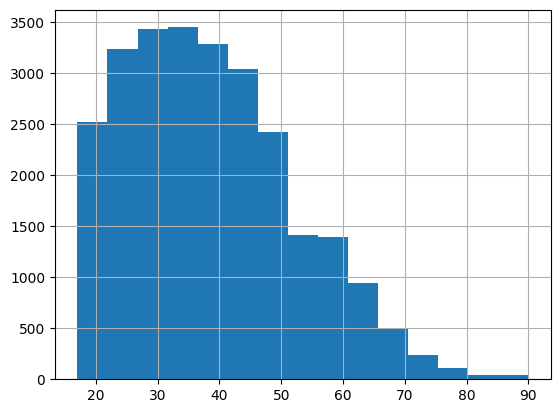

In [26]:
df['age'].hist(bins=15)

In [33]:
# Определите число СТРОК в которых присутствует хотя бы одно пропущенное значение (стоит символ ?)
df.isin(['?']).any(axis=1).sum()

1914

In [34]:
# Удалите строки, содеражащие пропуски
df = df[~df.isin(['?']).any(axis=1)]
df

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
3,40,Local-gov,24763,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
5,51,Private,237630,9,Tech-support,Husband,White,Male,7298,0,50,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,Self-emp-not-inc,179171,9,Sales,Unmarried,Black,Female,0,0,38,Germany,0
26044,39,Private,421633,10,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,0
26045,55,Private,82098,9,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,0
26046,26,Private,50053,13,Exec-managerial,Husband,White,Male,0,0,55,United-States,0
